# Imersão Mortorsports para Mulheres - AMattheis - Programação Aplicada

## Importando as bibliotecas

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignorando warnings - por detalhes estéticos
import warnings
warnings.filterwarnings('ignore')

## Importando o dataset

In [3]:
# Importando o dado em .csv para o código em Python através da função read_csv da biblioteca Pandas
df_crono = pd.read_excel('crono_treino.xlsx')
df_speed = pd.read_excel('speed_treino.xlsx')

In [4]:
# Não limitando o número de linhas que poderão ser visualizadas
pd.set_option('display.max_rows', None)

## Concatenando os datasets

In [5]:
# Mostra as 5 primeiras linhas do dataframe crono
df_crono.head()

,Car_ID,Lap,S1,S2,S3,Time_Lap,Gap
0,3,1,42.746,34.567,32.968,NaN,0.605
1,3,2,43.418,34.483,31.769,109.670,0.510
2,3,3,41.899,32.731,31.342,105.972,1.542
3,3,4,41.833,33.112,31.609,106.554,3.945
4,3,5,NaN,31.868,31.337,NaN,9.836


In [6]:
# Mostra as 5 primeiras linhas do dataframe speed
df_speed.head()

,Car_ID,Lap,Speed
0,3,1,227.0
1,3,2,228.8
2,3,3,226.4
3,3,4,228.3
4,3,5,227.6


In [7]:
# Deletando uma coluna no dataframe
# Como os dados crono e speed estão sincronizados, vamos excluir a coluna "Lap" do dataframe speed pois será redundante
df_speed.drop(columns=['Lap'], inplace=True)

In [8]:
# Verificando se a coluna foi deletada
df_speed.head(1)

,Car_ID,Speed
0,3,227.0


In [9]:
# Criando uma coluna de index para cada dataframe
# Para conseguir concatenar os dataframes precisamos de um valor de index (que não se repita no dataframe)
df_crono.insert(0,'index',df_crono.index)
df_speed.insert(0,'index',df_speed.index)

In [10]:
# Verificando a mundaça no dataframe crono
df_crono.head(20)

,index,Car_ID,Lap,S1,S2,S3,Time_Lap,Gap
0,0,3,1,42.746,34.567,32.968,NaN,0.605
1,1,3,2,43.418,34.483,31.769,109.670,0.510
2,2,3,3,41.899,32.731,31.342,105.972,1.542
3,3,3,4,41.833,33.112,31.609,106.554,3.945
4,4,3,5,NaN,31.868,31.337,NaN,9.836
5,5,3,6,40.264,31.581,31.084,102.929,5.152
6,6,3,7,40.251,31.404,30.996,102.651,1.820
7,7,3,8,40.074,31.621,31.449,103.144,9.904
8,8,3,9,40.928,31.941,38.677,NaN,8.499
9,9,3,10,184.391,NaN,31.745,NaN,8.259


In [11]:
# verificando a mudança no dataframe speed
df_speed.head(20)

,index,Car_ID,Speed
0,0,3,227.0
1,1,3,228.8
2,2,3,226.4
3,3,3,228.3
4,4,3,227.6
5,5,3,229.2
6,6,3,228.7
7,7,3,221.9
8,8,3,102.2
9,9,3,228.7


In [12]:
# Concatenar os dataframes crono e speed
df = pd.merge(df_crono, df_speed, on='index')

In [13]:
# Verificando as mudanças no dataframe
df.head()

,index,Car_ID_x,Lap,S1,S2,S3,Time_Lap,Gap,Car_ID_y,Speed
0,0,3,1,42.746,34.567,32.968,NaN,0.605,3,227.0
1,1,3,2,43.418,34.483,31.769,109.670,0.510,3,228.8
2,2,3,3,41.899,32.731,31.342,105.972,1.542,3,226.4
3,3,3,4,41.833,33.112,31.609,106.554,3.945,3,228.3
4,4,3,5,NaN,31.868,31.337,NaN,9.836,3,227.6


In [14]:
# Excluindo as coluna duplicadas e renomeando a coluna que teve seu nome alterado
df.drop(columns=['index', 'Car_ID_y'], inplace=True)
df.rename(columns = {'Car_ID_x':'Car_ID'}, inplace=True)

In [15]:
# Verificando as mudanças no dataframe
df.head(20)

,Car_ID,Lap,S1,S2,S3,Time_Lap,Gap,Speed
0,3,1,42.746,34.567,32.968,NaN,0.605,227.0
1,3,2,43.418,34.483,31.769,109.670,0.510,228.8
2,3,3,41.899,32.731,31.342,105.972,1.542,226.4
3,3,4,41.833,33.112,31.609,106.554,3.945,228.3
4,3,5,NaN,31.868,31.337,NaN,9.836,227.6
5,3,6,40.264,31.581,31.084,102.929,5.152,229.2
6,3,7,40.251,31.404,30.996,102.651,1.820,228.7
7,3,8,40.074,31.621,31.449,103.144,9.904,221.9
8,3,9,40.928,31.941,38.677,NaN,8.499,102.2
9,3,10,184.391,NaN,31.745,NaN,8.259,228.7


## Conhecendo o dataframe

In [16]:
# Informações sobre o dataframe (ex: nome da variável, tipo da variável, valores nulos e dimensão de linhas e colunas)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car_ID    256 non-null    int64  
 1   Lap       256 non-null    int64  
 2   S1        211 non-null    float64
 3   S2        233 non-null    float64
 4   S3        236 non-null    float64
 5   Time_Lap  176 non-null    float64
 6   Gap       255 non-null    float64
 7   Speed     241 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.0 KB


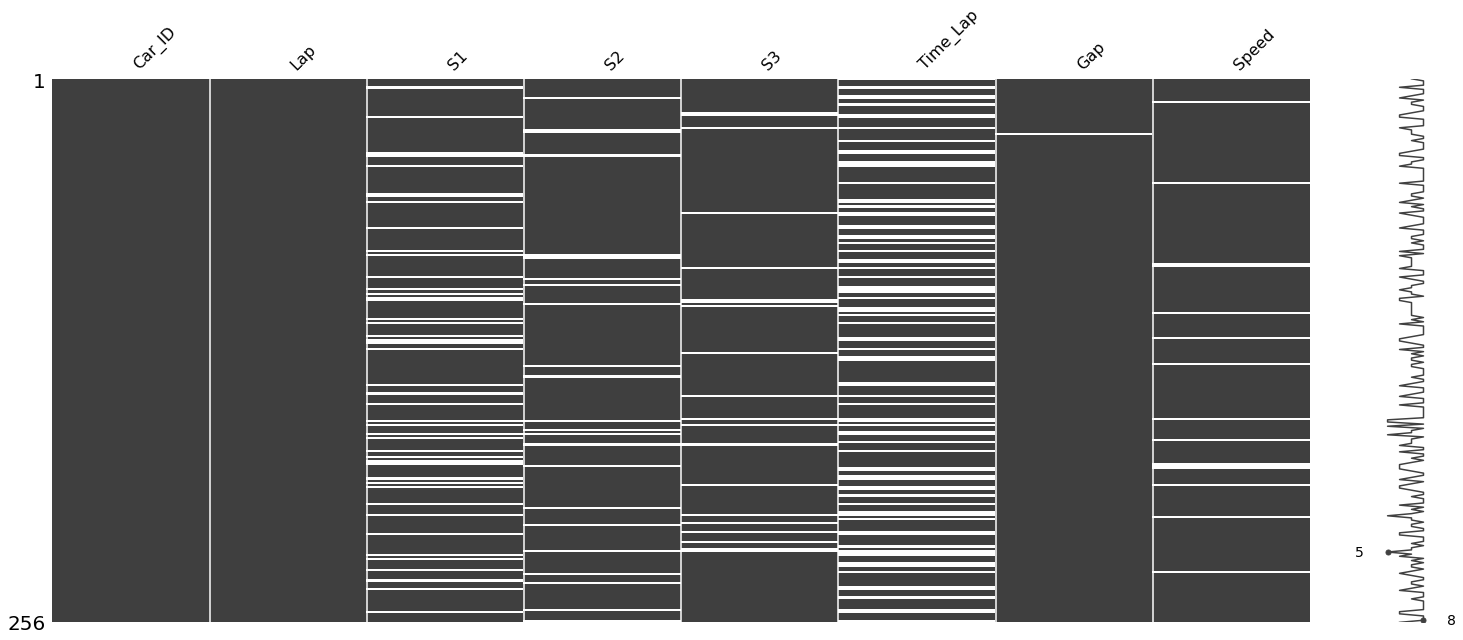

In [17]:
# Verifica os dados nulos do dataframe
import missingno as msno
msno.matrix(df)

O que fazer com os dados nulos?

Podemos ter missing values para valores numérios ou categóricos, segue exemplos de como preenchê-los:
- Numéricos: 
  - Média
  - Mediana
- Categóricas:
  - Moda (valor mais frequente)

Temos que tomar uma decisão sobre o que fazer com os dados ausentes, se devemos excluir ou preenchê-los. Cada caso tem sua especificidade e deve ser analisado por alguém que conhece do negócio em questão.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car_ID    256 non-null    int64  
 1   Lap       256 non-null    int64  
 2   S1        211 non-null    float64
 3   S2        233 non-null    float64
 4   S3        236 non-null    float64
 5   Time_Lap  176 non-null    float64
 6   Gap       255 non-null    float64
 7   Speed     241 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.0 KB


In [ ]:
# verificando dados ausentes
df.isnull().sum().sort_values(ascending=False)

Time_Lap    80
S1          45
S2          23
S3          20
Speed       15
Gap          1
Car_ID       0
Lap          0
dtype: int64

In [19]:
# verificando dados ausentes em %
((df.isnull().sum()*100)/df.shape[0]).round(2).sort_values(ascending=False)

Time_Lap    31.25
S1          17.58
S2           8.98
S3           7.81
Speed        5.86
Gap          0.39
Car_ID       0.00
Lap          0.00
dtype: float64

In [ ]:
# Calculando o percentual de dados faltantes de outra forma e ordenando de forma decrescente (.sort_values())
df.isna().mean().round(4).sort_values(ascending=False)*100

Time_Lap    31.25
S1          17.58
S2           8.98
S3           7.81
Speed        5.86
Gap          0.39
Car_ID       0.00
Lap          0.00
dtype: float64

Quais são as variáveis que mais possuem dados nulos? O que vamos fazer com eles?

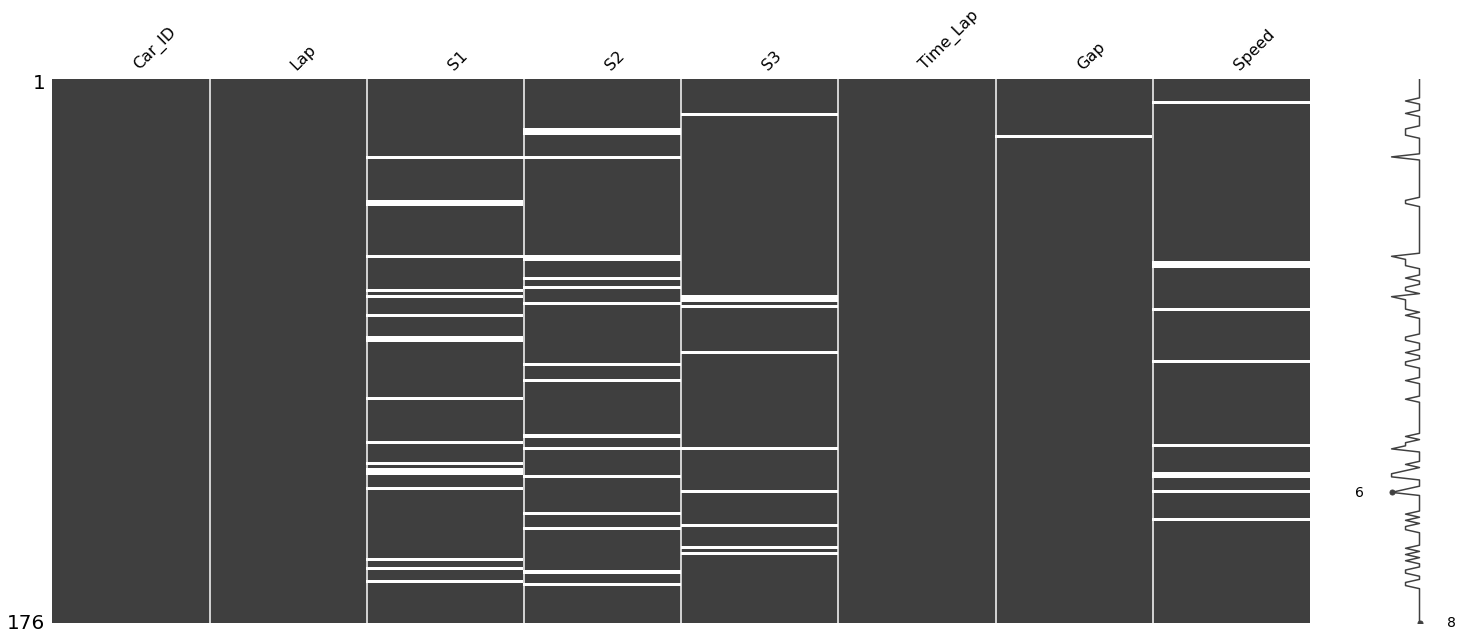

In [20]:
# Deletando os dados nulos da variável "Time Lap" e armazendo o resultado em um segundo dataframe ("df2") 
df2 = df.dropna(subset=['Time_Lap'])
# Verifica os dados nulos do segundo dataframe ("df2")
msno.matrix(df2)

## Criando novas variáveis

In [21]:
# Criando 2 grupos para análise, separando o grupo de carros do modelo Corolla e do modelo Cruze
carros_toyota = [6, 8, 10, 21, 30, 33, 44, 48, 65, 73, 88, 101, 111]

# Função que verifica se o carro está presente na lista de carros Toyota, se estiver retorna a string 'Corolla', senão retorna "Cruze"
def marca(x):
    if x in carros_toyota:
        return 'Corolla'
    else:
        return 'Cruze'

# Cria uma nova coluna com o nome "Montadora" e aplica a função "marca" para os dataframes 1 e 2
df['Montadora'] = df['Car_ID'].apply(marca)
df2['Montadora'] = df2['Car_ID'].apply(marca)

In [22]:
# Lista de equipes (ref. etapa1 2022)
blau_motorsport = [18, 70]
ktf_racing = [11, 121]
ipiranga_racing = [21, 30]
amattheis_vogel = [83, 9]
rcm_motorsport = [10, 44]
lubrax_team = [4, 19]
eurofarma_rc = [29, 90]
crown_racing = [0, 3]
cavaleiro_sports = [5, 80]
fulltime_sports = [101, 111]
ktf_sports = [12, 85]
shell_vpower = [28, 51]
fulltime_bassani = [8, 48]
hotcar = [54, 110]
piquet_sports = [33, 73]
crownII_racing = [43]
scuderia_cj = [88]

In [23]:
# Criando uma função que verifica qual é a equipe de cada carro e retorna uma string com o nome da equipe
# DESAFIO: Podemos criar essa função de uma outra forma mais simples? Através de um dicionário? Existe alguma função no Python que pode me ajudar?
def equipes(x):
    if x in blau_motorsport:
        return 'Blau Motorsport'
    elif x in ktf_racing:
        return 'KTF Racing'
    elif x in ipiranga_racing:
        return 'Ipiranga Racing'
    elif x in amattheis_vogel:
        return 'Amattheis Vogel'
    elif x in rcm_motorsport:
        return 'RCM Motorsport'
    elif x in lubrax_team:
        return 'LUBRAX Team'
    elif x in eurofarma_rc:
        return 'Eurofarma RC'
    elif x in crown_racing:
        return 'Crown Racing'
    elif x in cavaleiro_sports:
        return 'Cavaleiro Sports'
    elif x in fulltime_sports:
        return 'Fulltime Sports'
    elif x in ktf_sports:
        return 'KTF Sports'
    elif x in shell_vpower:
        return 'Shell V Power'
    elif x in fulltime_bassani:
        return 'Fulltime Bassani'
    elif x in hotcar:
        return 'Hot Car'
    elif x in piquet_sports:
        return 'Piquet Sports'
    elif x in crownII_racing:
        return 'Crown II Racing'
    elif x in scuderia_cj:
        return 'Scuderia CJ'
  
# Cria uma nova coluna com o nome "equipe" e aplica a função "equipes" para os dataframes 1 e 2
df['equipe'] = df['Car_ID'].apply(equipes)
df2['equipe'] = df2['Car_ID'].apply(equipes)

In [24]:
# Verificando as mudanças no dataframe 2
df2.head()

,Car_ID,Lap,S1,S2,S3,Time_Lap,Gap,Speed,Montadora,equipe
1,3,2,43.418,34.483,31.769,109.670,0.510,228.8,Cruze,Crown Racing
2,3,3,41.899,32.731,31.342,105.972,1.542,226.4,Cruze,Crown Racing
3,3,4,41.833,33.112,31.609,106.554,3.945,228.3,Cruze,Crown Racing
5,3,6,40.264,31.581,31.084,102.929,5.152,229.2,Cruze,Crown Racing
6,3,7,40.251,31.404,30.996,102.651,1.820,228.7,Cruze,Crown Racing


In [25]:
# Verificando as mudanças no dataframe 2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 254
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car_ID     176 non-null    int64  
 1   Lap        176 non-null    int64  
 2   S1         158 non-null    float64
 3   S2         159 non-null    float64
 4   S3         166 non-null    float64
 5   Time_Lap   176 non-null    float64
 6   Gap        175 non-null    float64
 7   Speed      166 non-null    float64
 8   Montadora  176 non-null    object 
 9   equipe     176 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.1+ KB


## Filtrando os dados

Vamos fazer algumas análises estatíticas das variáveis para verificar se precisamos filtrar mais algum dado do dataframe.

In [26]:
# Análise estatística para a variável S1
df2.S1.describe()

count    158.000000
mean      43.449443
std       10.890767
min       39.824000
25%       40.318250
50%       40.744000
75%       42.787500
max      125.957000
Name: S1, dtype: float64

O que você conclui da análise estatítica acima?

In [27]:
# Análise estatística para a variável S2
df2.S2.describe()

count    159.000000
mean      32.940528
std        1.989833
min       31.175000
25%       31.855500
50%       32.191000
75%       33.368000
max       47.957000
Name: S2, dtype: float64

O que você conclui da análise estatítica acima?

In [28]:
# Análise estatística para a variável S3
df2.S3.describe()

count    166.000000
mean      31.629349
std        1.006030
min       30.778000
25%       31.084750
50%       31.332000
75%       31.695000
max       37.688000
Name: S3, dtype: float64

O que você conclui da análise estatítica acima?

In [29]:
# Análise estatística para a variável Time Lap
df2["Time_Lap"].describe()

count    176.000000
mean     108.626199
std       13.211200
min      102.046000
25%      103.392500
50%      104.263500
75%      107.937750
max      192.942000
Name: Time_Lap, dtype: float64

O que você conclui da análise estatítica acima?

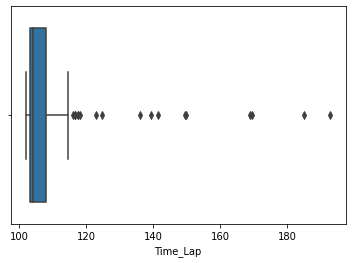

In [30]:
# Gráfico boxplot para a variável Time Lap
sns.boxplot(data=df2, x=df2["Time_Lap"])

Vamos filtrar mais a variável "Time Lap"?

In [31]:
# Filtrando novamente o dataframe, agora descartando dados de "Time Lap" maiores que 104 e armazenando o resultado no "dataframe_filter"
df_filter = df2[df["Time_Lap"] <= 104]

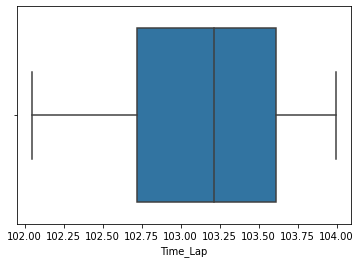

In [32]:
# Gráfico boxplot para verificar as mudanças na variável Time Lap
sns.boxplot(data=df_filter, x=df_filter["Time_Lap"])

## Análise bivariada (estatística)

In [33]:
# Criando a função estatística que aplica o .describe no dado de entrada da função
def estatistica (df, x):
  return df[x].describe().round(2)

In [34]:
# Criando uma lista que contém os setores e o tempo de volta
setores = ["S1", "S2", "S3", "Time_Lap"]

# Criando um loop que aplica a função "estatistica" para todas as variáveis da lista "setores"
for i in setores:
  print(f"Estatísticas para {i}")
  print(f"{estatistica(df_filter, i)} \n")


Estatísticas para S1
count    64.00
mean     40.32
std       0.27
min      39.82
25%      40.11
50%      40.30
75%      40.45
max      41.08
Name: S1, dtype: float64 

Estatísticas para S2
count    63.00
mean     31.78
std       0.29
min      31.18
25%      31.55
50%      31.78
75%      32.02
max      32.34
Name: S2, dtype: float64 

Estatísticas para S3
count    69.00
mean     31.06
std       0.15
min      30.78
25%      30.95
50%      31.04
75%      31.15
max      31.47
Name: S3, dtype: float64 

Estatísticas para Time_Lap
count     73.00
mean     103.18
std        0.53
min      102.05
25%      102.72
50%      103.22
75%      103.61
max      104.00
Name: Time_Lap, dtype: float64 



In [35]:
# Criando uma lista para ser utilizada na análise entre as equipes e outra para a análise entre as montadoras
analise_equipe = ["S1", "S2", "S3", "Time_Lap", "Speed", "equipe"]
analise_montadora = ["S1", "S2", "S3", "Time_Lap", "Speed", "Montadora"]

In [39]:
# Fazendo uma análise das médias dos setores, tempo de volta e velocidade de cada equipe e ordenando pela velocidade
df_filter[analise_equipe].groupby(by=["equipe"]).mean().round(3).sort_values(by=['Speed'], ascending=False)

,S1,S2,S3,Time_Lap,Speed
equipe,,,,,
Shell V Power,40.299,32.153,30.965,103.420,229.650
Ipiranga Racing,40.114,31.469,30.845,102.603,228.567
Scuderia CJ,40.434,32.102,31.277,103.813,228.400
Amattheis Vogel,40.075,31.511,30.962,102.574,228.140
KTF Racing,40.359,31.773,31.104,103.236,228.025
KTF Sports,40.427,31.787,31.074,103.288,227.467
LUBRAX Team,40.257,31.566,31.137,103.145,227.040
Crown Racing,40.130,31.505,31.114,102.749,226.600
Crown II Racing,40.503,31.918,31.161,103.575,225.500


O valor médio é a melhor métrica para esta análise?

In [ ]:
# Fazendo uma análise das médias dos setores, tempo de volta e velocidade de cada equipe e ordenando pelo tempo de volta
df_filter[analise_equipe].groupby(by=["equipe"]).mean().round(3).sort_values(by=['Time_Lap'], ascending=True)

,S1,S2,S3,Time_Lap,Speed
equipe,,,,,
Amattheis Vogel,40.075,31.511,30.962,102.574,228.140
Ipiranga Racing,40.114,31.469,30.845,102.603,228.567
Crown Racing,40.130,31.505,31.114,102.749,226.600
Fulltime Sports,40.378,31.591,31.068,102.833,170.500
Cavaleiro Sports,40.400,31.604,30.892,102.962,170.250
LUBRAX Team,40.257,31.566,31.137,103.145,227.040
KTF Racing,40.359,31.773,31.104,103.236,228.025
Hot Car,40.427,31.690,31.144,103.270,225.467
KTF Sports,40.427,31.787,31.074,103.288,227.467


In [40]:
# Fazendo uma análise do valor mínimo dos setores, tempo de volta e velocidade de cada montadora e ordenando pelo tempo de volta
df_filter[analise_montadora].groupby(by=["Montadora"]).min().round(3).sort_values(by=['Time_Lap'], ascending=True)

,S1,S2,S3,Time_Lap,Speed
Montadora,,,,,
Corolla,39.938,31.175,30.845,102.046,0.0
Cruze,39.824,31.252,30.778,102.048,0.0


Existe uma diferença de característica entre as montadoras?

In [ ]:
# Comparando o valor máximo de velocidade de cada montadora
df_filter[['Speed', 'Montadora']].groupby(by=["Montadora"]).max().round(3).sort_values(by=['Speed'], ascending=False)

,Speed
Montadora,
Cruze,231.0
Corolla,230.4


In [ ]:
# Ordenando os dados de forma ascendente pelo tempo de volta
df_filter.sort_values(by=['Time_Lap'], ascending=True)

,Car_ID,Lap,S1,S2,S3,Time_Lap,Gap,Speed,Montadora,equipe
231,101,12,NaN,31.175,31.091,102.046,15.363,0.0,Toyota,Fulltime Sports
88,19,12,39.824,31.252,30.972,102.048,28.010,NaN,Cruze,LUBRAX Team
110,30,11,40.005,31.219,30.845,102.069,2.301,NaN,Toyota,Ipiranga Racing
199,83,4,39.935,31.323,30.884,102.142,4.723,227.7,Cruze,Amattheis Vogel
11,3,12,39.933,31.415,30.925,102.273,1.559,NaN,Cruze,Crown Racing
38,5,13,40.046,31.472,30.786,102.304,16.520,227.6,Cruze,Cavaleiro Sports
62,12,13,39.916,31.437,31.027,102.380,2.300,226.9,Cruze,KTF Sports
107,30,8,40.195,31.409,NaN,102.454,1.350,229.3,Toyota,Ipiranga Racing
105,30,6,40.142,31.482,NaN,102.484,11.701,228.7,Toyota,Ipiranga Racing
37,5,12,40.079,31.571,30.851,102.501,17.443,226.8,Cruze,Cavaleiro Sports


O que aconteceria se tivessemos excluído todos os dados nulos do dataframe anteriormente?

In [ ]:
# Ordenando os dados de forma decrescente pela velocidade
df_filter.sort_values(by=['Speed'], ascending=False)

,Car_ID,Lap,S1,S2,S3,Time_Lap,Gap,Speed,Montadora,equipe
95,28,7,40.163,32.049,30.923,103.135,1.289,231.0,Cruze,Shell V Power
165,70,5,40.311,NaN,30.902,103.503,0.621,230.8,Cruze,Blau Motorsport
164,70,4,40.618,32.182,31.013,103.813,1.277,230.8,Cruze,Blau Motorsport
71,18,8,40.313,31.869,31.173,103.355,18.485,230.7,Cruze,Blau Motorsport
97,28,9,40.048,NaN,31.042,103.210,6.808,230.5,Cruze,Shell V Power
120,33,10,40.472,32.081,31.046,103.599,9.890,230.4,Corolla,Piquet Sports
118,33,8,40.562,32.133,31.143,103.838,5.208,230.3,Corolla,Piquet Sports
72,18,9,40.474,32.039,31.159,103.672,18.132,230.3,Cruze,Blau Motorsport
94,28,6,40.244,NaN,31.146,103.650,1.730,230.1,Cruze,Shell V Power
140,51,6,40.293,NaN,30.841,103.144,4.022,230.1,Cruze,Shell V Power


## Análise gráfica

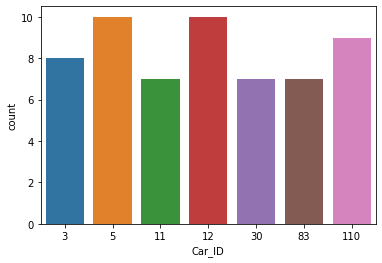

In [41]:
# Gráfico de barras mostrando a contagem/ocorrencia de um grupo de carros selecionados
# Verificando o nº de voltas de um grupo de carros escolhidos 
sns.countplot(df2["Car_ID"], order=[3, 5, 11, 12, 30, 83, 110]);

Qual é a informação que este gráfico nos traz? Porque precisamos ter essa resposta?

In [42]:
# Criando uma lista com as variáveis quantitativas do dataframe
var_quant = ['S1', 'S2', 'S3', 'Time_Lap', 'Gap', 'Speed']

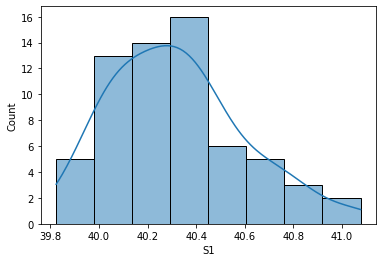

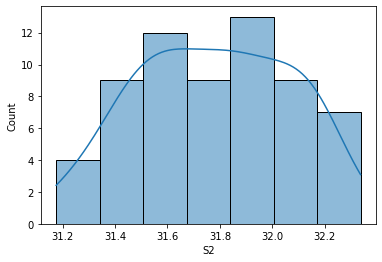

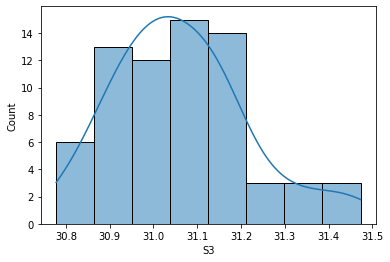

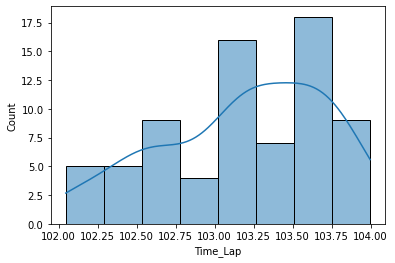

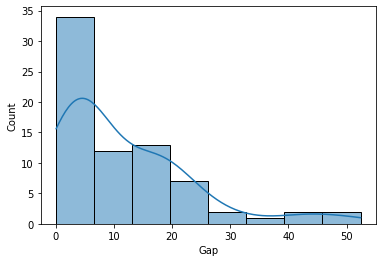

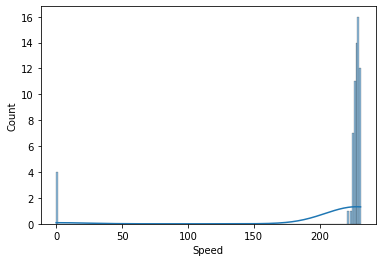

In [43]:
# Criando um loop para plotar histogramas das variáveis quantitativas.
for var in var_quant:
  sns.histplot(df_filter[var], kde=True)
  plt.show()

Qual é o tipo de distribuição das variáveis pelo gráfico do histograma?   
Ainda existem outliers nas variáveis quantitativas?

## Análise bivariada (gráfica)

In [44]:
# Importando biblioteca para melhorar visualização gráfica
from IPython.display import display

# Fazendo uma análise estatística do setor 1 para cada carro
for var in var_quant:
    display(df_filter[['Car_ID', var]].groupby('Car_ID').describe().round(2))

S1                                                
       count   mean   std    min    25%    50%    75%    max
Car_ID                                                      
3        4.0  40.13  0.16  39.93  40.04  40.16  40.25  40.26
4        3.0  40.39  0.33  40.06  40.24  40.42  40.56  40.71
5        2.0  40.06  0.02  40.05  40.05  40.06  40.07  40.08
12       3.0  40.43  0.54  39.92  40.14  40.37  40.68  41.00
18       5.0  40.34  0.13  40.14  40.31  40.36  40.42  40.47
19       3.0  40.12  0.30  39.82  39.97  40.12  40.27  40.42
28       3.0  40.15  0.10  40.05  40.11  40.16  40.20  40.24
30       3.0  40.11  0.10  40.01  40.07  40.14  40.17  40.20
33       2.0  40.52  0.06  40.47  40.49  40.52  40.54  40.56
43       3.0  40.50  0.30  40.24  40.34  40.44  40.63  40.83
51       6.0  40.37  0.26  40.05  40.20  40.35  40.53  40.76
54       2.0  40.37  0.07  40.32  40.34  40.37  40.40  40.42
70       4.0  40.39  0.15  40.28  40.30  40.34  40.43  40.62
73       3.0  40.49  0.19  40.31  40.40  40.49  40.59  40.68
80       1.0  41.08   NaN  41.08  41.08  41.08  41.08  41.08
83       6.0  40.07  0.13  39.94  40.02  40.04  40.09  40.32
88       1.0  40.43   NaN  40.43  40.43  40.43  40.43  40.43
101      2.0  40.38  0.62  39.94  40.16  40.38  40.60  40.82
110      4.0  40.46  0.32  40.11  40.23  40.46  40.69  40.79
121      4.0  40.36  0.18  40.21  40.21  40.32  40.47  40.58

S2                                                
       count   mean   std    min    25%    50%    75%    max
Car_ID                                                      
3        4.0  31.51  0.11  31.40  31.41  31.50  31.59  31.62
4        2.0  31.82  0.38  31.55  31.69  31.82  31.96  32.09
5        2.0  31.52  0.07  31.47  31.50  31.52  31.55  31.57
12       3.0  31.79  0.31  31.44  31.68  31.93  31.96  31.99
18       5.0  31.83  0.15  31.66  31.73  31.86  31.87  32.04
19       2.0  31.31  0.08  31.25  31.28  31.31  31.34  31.37
28       1.0  32.05   NaN  32.05  32.05  32.05  32.05  32.05
30       4.0  31.47  0.23  31.22  31.36  31.45  31.55  31.76
33       3.0  32.07  0.08  31.98  32.03  32.08  32.11  32.13
43       3.0  31.92  0.26  31.70  31.78  31.85  32.02  32.20
51       6.0  32.17  0.04  32.11  32.15  32.17  32.19  32.23
54       2.0  31.94  0.07  31.89  31.91  31.94  31.96  31.98
70       4.0  32.15  0.16  31.96  32.09  32.16  32.22  32.34
73       4.0  31.81  0.08  31.73  31.77  31.80  31.84  31.93
80       1.0  31.77   NaN  31.77  31.77  31.77  31.77  31.77
83       5.0  31.51  0.14  31.32  31.44  31.52  31.58  31.68
88       1.0  32.10   NaN  32.10  32.10  32.10  32.10  32.10
101      4.0  31.59  0.30  31.18  31.52  31.64  31.71  31.91
110      3.0  31.53  0.03  31.49  31.51  31.54  31.54  31.55
121      4.0  31.77  0.12  31.61  31.73  31.82  31.86  31.86

S3                                                
       count   mean   std    min    25%    50%    75%    max
Car_ID                                                      
3        4.0  31.11  0.23  30.92  30.98  31.04  31.18  31.45
4        3.0  31.01  0.18  30.89  30.91  30.92  31.07  31.21
5        3.0  30.80  0.04  30.78  30.78  30.79  30.82  30.85
12       3.0  31.07  0.07  31.03  31.04  31.04  31.10  31.15
18       5.0  31.13  0.05  31.04  31.14  31.15  31.16  31.17
19       4.0  31.23  0.26  30.97  31.04  31.25  31.45  31.47
28       3.0  31.04  0.11  30.92  30.98  31.04  31.09  31.15
30       1.0  30.84   NaN  30.84  30.84  30.84  30.84  30.84
33       3.0  31.04  0.10  30.94  30.99  31.05  31.09  31.14
43       2.0  31.16  0.10  31.09  31.12  31.16  31.20  31.24
51       7.0  30.93  0.08  30.84  30.88  30.93  30.99  31.05
54       2.0  31.24  0.10  31.17  31.20  31.24  31.27  31.31
70       5.0  31.03  0.08  30.90  31.01  31.04  31.06  31.13
73       4.0  31.21  0.12  31.09  31.11  31.19  31.28  31.36
80       1.0  31.15   NaN  31.15  31.15  31.15  31.15  31.15
83       6.0  30.96  0.06  30.88  30.94  30.95  30.97  31.07
88       1.0  31.28   NaN  31.28  31.28  31.28  31.28  31.28
101      4.0  31.07  0.10  30.99  30.99  31.04  31.12  31.20
110      4.0  31.10  0.19  30.95  31.00  31.03  31.13  31.37
121      4.0  31.10  0.07  31.01  31.08  31.13  31.15  31.15

Time_Lap                                                      
          count    mean   std     min     25%     50%     75%     max
Car_ID                                                               
3           4.0  102.75  0.38  102.27  102.56  102.79  102.98  103.14
4           3.0  103.27  0.44  102.86  103.04  103.22  103.47  103.73
5           3.0  102.62  0.39  102.30  102.40  102.50  102.77  103.05
12          3.0  103.29  0.82  102.38  102.94  103.51  103.74  103.97
18          5.0  103.30  0.25  103.02  103.16  103.31  103.36  103.67
19          4.0  103.05  0.90  102.05  102.42  103.15  103.78  103.87
28          3.0  103.33  0.28  103.14  103.17  103.21  103.43  103.65
30          4.0  102.60  0.57  102.07  102.36  102.47  102.71  103.40
33          3.0  103.52  0.37  103.11  103.35  103.60  103.72  103.84
43          3.0  103.58  0.22  103.33  103.50  103.67  103.70  103.73
51          7.0  103.46  0.29  103.14  103.20  103.51  103.61  103.92
54          2.0  103.54  0.04  103.51  103.53  103.54  103.56  103.58
70          5.0  103.60  0.21  103.29  103.50  103.68  103.74  103.81
73          4.0  103.54  0.25  103.19  103.49  103.60  103.65  103.77
80          1.0  104.00   NaN  104.00  104.00  104.00  104.00  104.00
83          6.0  102.57  0.22  102.14  102.61  102.63  102.69  102.72
88          1.0  103.81   NaN  103.81  103.81  103.81  103.81  103.81
101         4.0  102.83  0.79  102.05  102.44  102.68  103.07  103.92
110         4.0  103.13  0.39  102.62  103.02  103.17  103.28  103.57
121         4.0  103.24  0.07  103.18  103.20  103.21  103.25  103.34

Gap                                                 
       count   mean    std    min    25%    50%    75%    max
Car_ID                                                       
3        4.0   4.61   3.89   1.56   1.75   3.49   6.34   9.90
4        3.0  17.56   7.92  11.14  13.13  15.12  20.76  26.41
5        3.0  17.36   0.80  16.52  16.98  17.44  17.78  18.12
12       3.0   7.54  11.04   0.09   1.20   2.30  11.26  20.22
18       5.0  30.94  17.48  18.07  18.13  18.49  47.61  52.38
19       4.0   9.44  12.38   2.97   3.21   3.39   9.62  28.01
28       3.0   3.28   3.07   1.29   1.51   1.73   4.27   6.81
30       4.0   6.82   5.78   1.35   2.06   7.00  11.76  11.94
33       3.0   8.14   2.55   5.21   7.26   9.32   9.61   9.89
43       3.0   3.53   2.44   0.75   2.64   4.54   4.92   5.29
51       7.0  17.02  10.17   4.02  10.96  17.37  20.87  34.07
54       2.0   5.94   0.14   5.84   5.89   5.94   5.99   6.04
70       5.0   2.69   1.74   0.62   1.28   2.99   3.68   4.88
73       4.0   5.25   3.59   0.09   4.18   6.56   7.64   7.79
80       1.0  20.19    NaN  20.19  20.19  20.19  20.19  20.19
83       6.0   5.38   2.51   2.73   3.85   4.46   7.01   9.15
88       1.0   1.57    NaN   1.57   1.57   1.57   1.57   1.57
101      4.0  26.78  11.12  15.36  21.83  24.88  29.82  42.00
110      4.0  17.84  17.60   3.08   7.41  12.68  23.11  42.92
121      4.0  15.00   8.90   2.17  13.39  17.55  19.16  22.75

Speed                                                      
       count    mean     std    min     25%     50%     75%    max
Car_ID                                                            
3        3.0  226.60    4.08  221.9  225.30  228.70  228.95  229.2
4        3.0  227.67    0.55  227.1  227.40  227.70  227.95  228.2
5        3.0  227.00    0.53  226.6  226.70  226.80  227.20  227.6
12       3.0  227.47    1.07  226.8  226.85  226.90  227.80  228.7
18       5.0  229.92    0.60  229.2  229.50  229.90  230.30  230.7
19       2.0  226.10    0.99  225.4  225.75  226.10  226.45  226.8
28       3.0  230.53    0.45  230.1  230.30  230.50  230.75  231.0
30       3.0  228.57    0.81  227.7  228.20  228.70  229.00  229.3
33       3.0  153.57  132.99    0.0  115.15  230.30  230.35  230.4
43       2.0  225.50    0.14  225.4  225.45  225.50  225.55  225.6
51       7.0  229.27    0.50  228.7  228.95  229.00  229.60  230.1
54       2.0  225.20    1.13  224.4  224.80  225.20  225.60  226.0
70       4.0  172.88  115.25    0.0  172.42  230.35  230.80  230.8
73       4.0  226.42    0.74  225.5  226.02  226.50  226.90  227.2
80       1.0    0.00     NaN    0.0    0.00    0.00    0.00    0.0
83       5.0  228.14    0.62  227.5  227.70  228.20  228.20  229.1
88       1.0  228.40     NaN  228.4  228.40  228.40  228.40  228.4
101      4.0  170.50  113.67    0.0  170.40  227.25  227.35  227.5
110      4.0  225.60    0.61  225.0  225.23  225.50  225.88  226.4
121      4.0  228.02    1.09  226.7  227.38  228.15  228.80  229.1

O que você espera ter de informação com essa análise entre carros?

In [45]:
# Fazendo uma análise estatística das variáveis quantitativas para cada equipe
for var in var_quant:
    display(df_filter[['equipe', var]].groupby('equipe').describe().round(2))

S1                                                
                 count   mean   std    min    25%    50%    75%    max
equipe                                                                
Amattheis Vogel    6.0  40.07  0.13  39.94  40.02  40.04  40.09  40.32
Blau Motorsport    9.0  40.36  0.13  40.14  40.31  40.36  40.42  40.62
Cavaleiro Sports   3.0  40.40  0.59  40.05  40.06  40.08  40.58  41.08
Crown II Racing    3.0  40.50  0.30  40.24  40.34  40.44  40.63  40.83
Crown Racing       4.0  40.13  0.16  39.93  40.04  40.16  40.25  40.26
Fulltime Sports    2.0  40.38  0.62  39.94  40.16  40.38  40.60  40.82
Hot Car            6.0  40.43  0.25  40.11  40.28  40.37  40.60  40.79
Ipiranga Racing    3.0  40.11  0.10  40.01  40.07  40.14  40.17  40.20
KTF Racing         4.0  40.36  0.18  40.21  40.21  40.32  40.47  40.58
KTF Sports         3.0  40.43  0.54  39.92  40.14  40.37  40.68  41.00
LUBRAX Team        6.0  40.26  0.32  39.82  40.07  40.27  40.42  40.71
Piquet Sports      5.0  40.50  0.14  40.31  40.47  40.49  40.56  40.68
Scuderia CJ        1.0  40.43   NaN  40.43  40.43  40.43  40.43  40.43
Shell V Power      9.0  40.30  0.24  40.05  40.16  40.24  40.40  40.76

S2                                                
                 count   mean   std    min    25%    50%    75%    max
equipe                                                                
Amattheis Vogel    5.0  31.51  0.14  31.32  31.44  31.52  31.58  31.68
Blau Motorsport    9.0  31.97  0.22  31.66  31.86  31.96  32.14  32.34
Cavaleiro Sports   3.0  31.60  0.15  31.47  31.52  31.57  31.67  31.77
Crown II Racing    3.0  31.92  0.26  31.70  31.78  31.85  32.02  32.20
Crown Racing       4.0  31.51  0.11  31.40  31.41  31.50  31.59  31.62
Fulltime Sports    4.0  31.59  0.30  31.18  31.52  31.64  31.71  31.91
Hot Car            5.0  31.69  0.23  31.49  31.54  31.55  31.89  31.98
Ipiranga Racing    4.0  31.47  0.23  31.22  31.36  31.45  31.55  31.76
KTF Racing         4.0  31.77  0.12  31.61  31.73  31.82  31.86  31.86
KTF Sports         3.0  31.79  0.31  31.44  31.68  31.93  31.96  31.99
LUBRAX Team        4.0  31.57  0.37  31.25  31.34  31.46  31.69  32.09
Piquet Sports      7.0  31.92  0.15  31.73  31.80  31.93  32.03  32.13
Scuderia CJ        1.0  32.10   NaN  32.10  32.10  32.10  32.10  32.10
Shell V Power      7.0  32.15  0.06  32.05  32.12  32.17  32.18  32.23

S3                                                
                 count   mean   std    min    25%    50%    75%    max
equipe                                                                
Amattheis Vogel    6.0  30.96  0.06  30.88  30.94  30.95  30.97  31.07
Blau Motorsport   10.0  31.08  0.09  30.90  31.04  31.09  31.14  31.17
Cavaleiro Sports   4.0  30.89  0.18  30.78  30.78  30.82  30.93  31.15
Crown II Racing    2.0  31.16  0.10  31.09  31.12  31.16  31.20  31.24
Crown Racing       4.0  31.11  0.23  30.92  30.98  31.04  31.18  31.45
Fulltime Sports    4.0  31.07  0.10  30.99  30.99  31.04  31.12  31.20
Hot Car            6.0  31.14  0.17  30.95  31.03  31.11  31.27  31.37
Ipiranga Racing    1.0  30.84   NaN  30.84  30.84  30.84  30.84  30.84
KTF Racing         4.0  31.10  0.07  31.01  31.08  31.13  31.15  31.15
KTF Sports         3.0  31.07  0.07  31.03  31.04  31.04  31.10  31.15
LUBRAX Team        7.0  31.14  0.24  30.89  30.95  31.06  31.32  31.47
Piquet Sports      7.0  31.14  0.14  30.94  31.07  31.12  31.20  31.36
Scuderia CJ        1.0  31.28   NaN  31.28  31.28  31.28  31.28  31.28
Shell V Power     10.0  30.97  0.10  30.84  30.91  30.95  31.03  31.15

Time_Lap                                                \
                    count    mean   std     min     25%     50%     75%   
equipe                                                                    
Amattheis Vogel       6.0  102.57  0.22  102.14  102.61  102.63  102.69   
Blau Motorsport      10.0  103.45  0.27  103.02  103.29  103.43  103.68   
Cavaleiro Sports      4.0  102.96  0.76  102.30  102.45  102.77  103.29   
Crown II Racing       3.0  103.58  0.22  103.33  103.50  103.67  103.70   
Crown Racing          4.0  102.75  0.38  102.27  102.56  102.79  102.98   
Fulltime Sports       4.0  102.83  0.79  102.05  102.44  102.68  103.07   
Hot Car               6.0  103.27  0.37  102.62  103.16  103.35  103.56   
Ipiranga Racing       4.0  102.60  0.57  102.07  102.36  102.47  102.71   
KTF Racing            4.0  103.24  0.07  103.18  103.20  103.21  103.25   
KTF Sports            3.0  103.29  0.82  102.38  102.94  103.51  103.74   
LUBRAX Team           7.0  103.15  0.69  102.05  102.70  103.22  103.74   
Piquet Sports         7.0  103.53  0.28  103.11  103.39  103.60  103.69   
Scuderia CJ           1.0  103.81   NaN  103.81  103.81  103.81  103.81   
Shell V Power        10.0  103.42  0.28  103.14  103.19  103.37  103.63   

                          
                     max  
equipe                    
Amattheis Vogel   102.72  
Blau Motorsport   103.81  
Cavaleiro Sports  104.00  
Crown II Racing   103.73  
Crown Racing      103.14  
Fulltime Sports   103.92  
Hot Car           103.58  
Ipiranga Racing   103.40  
KTF Racing        103.34  
KTF Sports        103.97  
LUBRAX Team       103.87  
Piquet Sports     103.84  
Scuderia CJ       103.81  
Shell V Power     103.92

Gap                                                 
                 count   mean    std    min    25%    50%    75%    max
equipe                                                                 
Amattheis Vogel    6.0   5.38   2.51   2.73   3.85   4.46   7.01   9.15
Blau Motorsport   10.0  16.81  18.94   0.62   3.16  11.48  18.40  52.38
Cavaleiro Sports   4.0  18.07   1.56  16.52  17.21  17.78  18.64  20.19
Crown II Racing    3.0   3.53   2.44   0.75   2.64   4.54   4.92   5.29
Crown Racing       4.0   4.61   3.89   1.56   1.75   3.49   6.34   9.90
Fulltime Sports    4.0  26.78  11.12  15.36  21.83  24.88  29.82  42.00
Hot Car            6.0  13.87  14.95   3.08   5.89   7.45  14.59  42.92
Ipiranga Racing    4.0   6.82   5.78   1.35   2.06   7.00  11.76  11.94
KTF Racing         4.0  15.00   8.90   2.17  13.39  17.55  19.16  22.75
KTF Sports         3.0   7.54  11.04   0.09   1.20   2.30  11.26  20.22
LUBRAX Team        7.0  12.92  10.79   2.97   3.39  11.14  20.76  28.01
Piquet Sports      7.0   6.49   3.32   0.09   5.37   7.58   8.56   9.89
Scuderia CJ        1.0   1.57    NaN   1.57   1.57   1.57   1.57   1.57
Shell V Power     10.0  12.89  10.73   1.29   4.41  11.57  19.78  34.07

Speed                                                      
                 count    mean     std    min     25%     50%     75%    max
equipe                                                                      
Amattheis Vogel    5.0  228.14    0.62  227.5  227.70  228.20  228.20  229.1
Blau Motorsport    9.0  204.57   76.71    0.0  229.50  229.90  230.70  230.8
Cavaleiro Sports   4.0  170.25  113.50    0.0  169.95  226.70  227.00  227.6
Crown II Racing    2.0  225.50    0.14  225.4  225.45  225.50  225.55  225.6
Crown Racing       3.0  226.60    4.08  221.9  225.30  228.70  228.95  229.2
Fulltime Sports    4.0  170.50  113.67    0.0  170.40  227.25  227.35  227.5
Hot Car            6.0  225.47    0.72  224.4  225.08  225.50  225.92  226.4
Ipiranga Racing    3.0  228.57    0.81  227.7  228.20  228.70  229.00  229.3
KTF Racing         4.0  228.02    1.09  226.7  227.38  228.15  228.80  229.1
KTF Sports         3.0  227.47    1.07  226.8  226.85  226.90  227.80  228.7
LUBRAX Team        5.0  227.04    1.06  225.4  226.80  227.10  227.70  228.2
Piquet Sports      7.0  195.20   86.10    0.0  225.85  226.80  228.75  230.4
Scuderia CJ        1.0  228.40     NaN  228.4  228.40  228.40  228.40  228.4
Shell V Power     10.0  229.65    0.76  228.7  229.00  229.60  230.10  231.0

É interessante fazer uma análise comparativa entre equipes?

In [51]:
df_filter.Montadora

5        Cruze
6        Cruze
7        Cruze
11       Cruze
19       Cruze
22       Cruze
25       Cruze
36       Cruze
37       Cruze
38       Cruze
56       Cruze
59       Cruze
62       Cruze
68       Cruze
71       Cruze
72       Cruze
73       Cruze
76       Cruze
83       Cruze
84       Cruze
87       Cruze
88       Cruze
94       Cruze
95       Cruze
97       Cruze
104    Corolla
105    Corolla
107    Corolla
110    Corolla
118    Corolla
120    Corolla
121    Corolla
129      Cruze
130      Cruze
134      Cruze
139      Cruze
140      Cruze
142      Cruze
145      Cruze
146      Cruze
147      Cruze
148      Cruze
154      Cruze
156      Cruze
164      Cruze
165      Cruze
168      Cruze
169      Cruze
170      Cruze
176    Corolla
177    Corolla
178    Corolla
179    Corolla
195      Cruze
198      Cruze
199      Cruze
201      Cruze
202      Cruze
203      Cruze
206      Cruze
219    Corolla
225    Corolla
226    Corolla
227    Corolla
231    Corolla
237      Cruze
238      C

In [50]:
var_quant

['S1', 'S2', 'S3', 'Time_Lap', 'Gap', 'Speed']

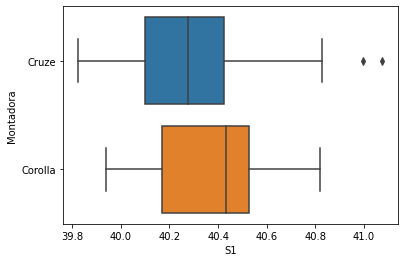

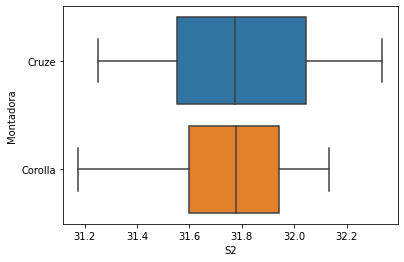

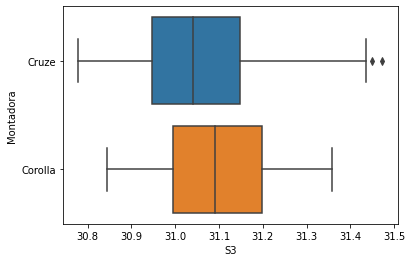

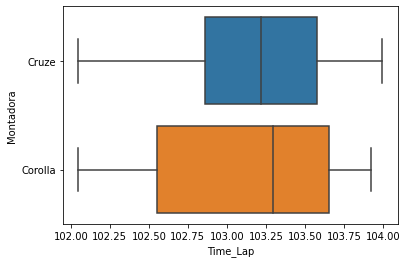

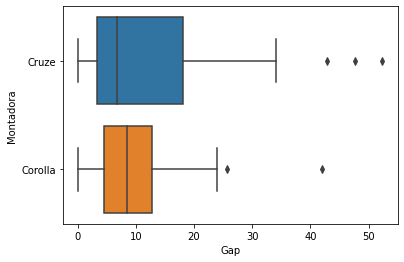

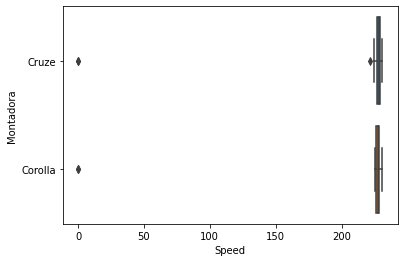

In [46]:
# Criando um loop para plotar bloxplot das variáveis quantitativas das montadoras.
for var in var_quant:
  sns.boxplot(data=df_filter, x=df_filter[var], y=df_filter.Montadora)
  plt.show()

Qual variável não conseguimos ter uma boa visualização? O que fazer?

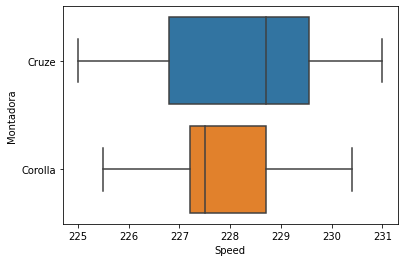

In [47]:
# Criando um gráfico boxplot para a variável "Speed" filtrada (>225), eliminando os outliers e comparando os valores entre as montadoras
sns.boxplot(data=df_filter, x=df_filter.Speed[df.Speed >= 225], y=df_filter.Montadora)

Existe uma tendência de uma marca estar mais rápida que a outra?

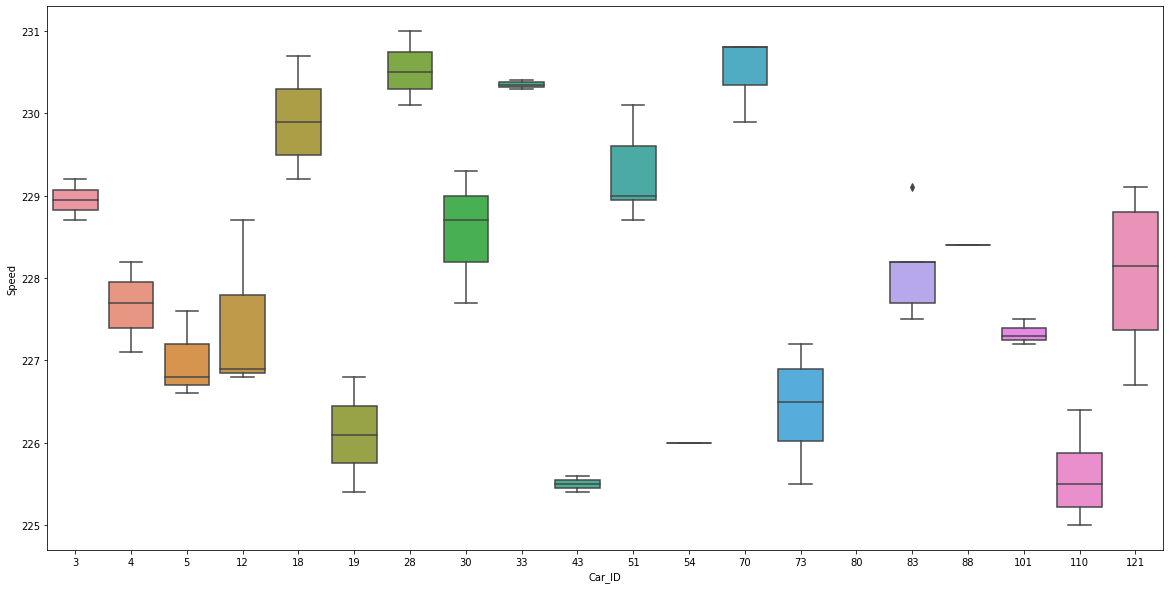

In [48]:
# Criando um gráfico boxplot para a variável "Speed" filtrada (>225), comparando todos os carros
plt.figure(figsize=(20,10))
sns.boxplot(data=df_filter, y=df_filter.Speed[df.Speed >= 225], x=df_filter.Car_ID)

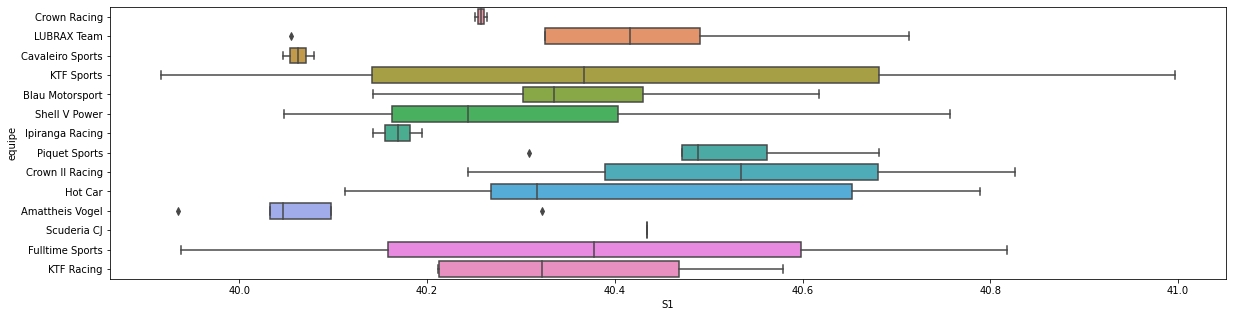

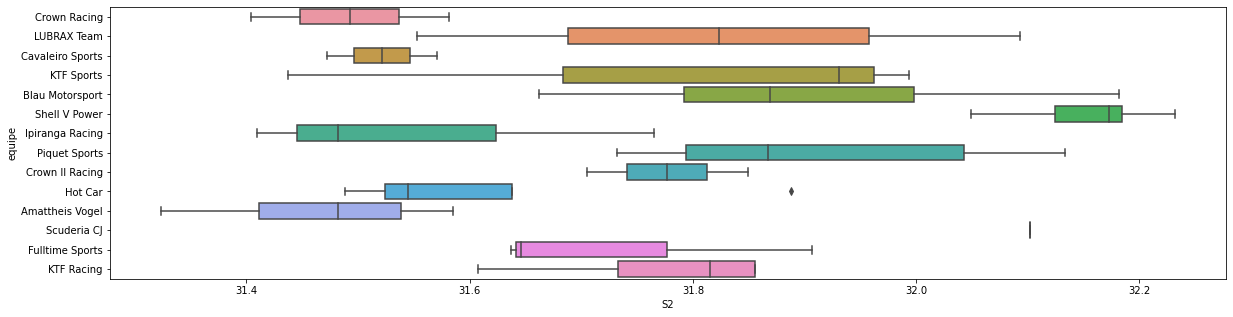

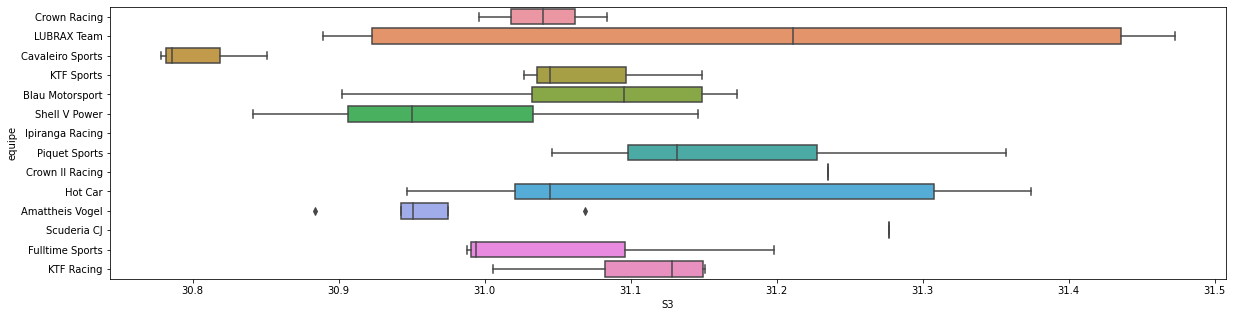

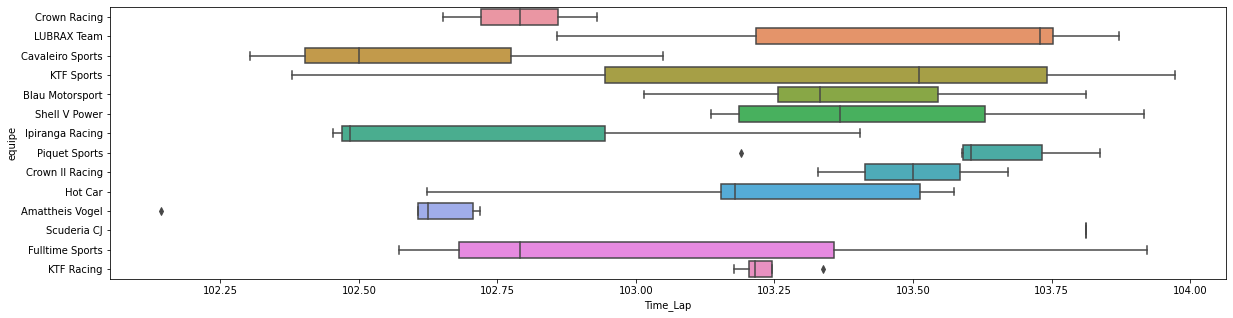

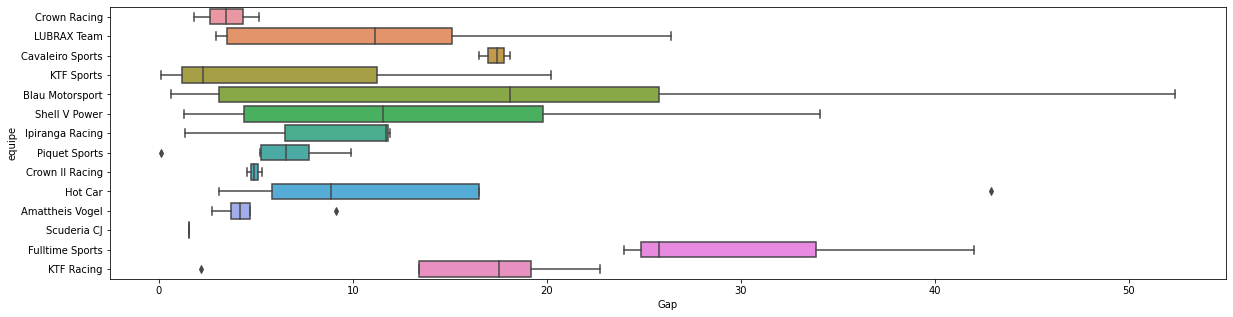

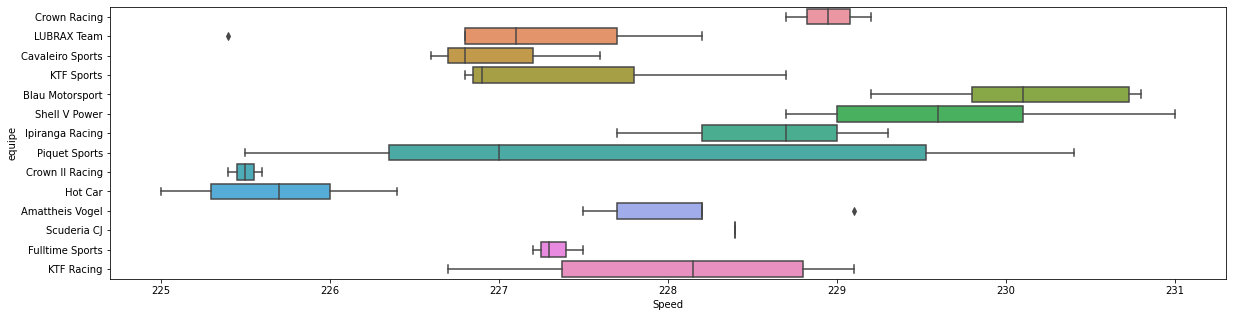

In [49]:
# Criando um dataframe com a velocidade filtrada
df_filter2 = df_filter[df_filter.Speed >= 225]

# Criando um loop para plotar bloxplot das variáveis quantitativas das equipes.
for var in var_quant:
  plt.figure(figsize=(20,5))
  sns.boxplot(data=df_filter2, x=df_filter2[var], y=df_filter2.equipe)
  plt.show()

Cite pelo menos 3 análises que você pode tirar destes gráficos.